In [1]:
import os


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


n_objectives = 3

os.environ["DEEPHYPER_BENCHMARK_DTLZ_PROB"] = str(2)
os.environ["DEEPHYPER_BENCHMARK_NDIMS"] = str(8)
os.environ["DEEPHYPER_BENCHMARK_NOBJS"] = str(n_objectives)
os.environ["DEEPHYPER_BENCHMARK_DTLZ_OFFSET"] = str(0.6)
os.environ["DEEPHYPER_BENCHMARK_FAILURES"] = str(0)

In [2]:
# Try other scalers
# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

In [3]:
import deephyper_benchmark as dhb
dhb.load("DTLZ")
from deephyper_benchmark.lib.dtlz import hpo, metrics

## Scalarization and Pareto front

In [4]:
from deephyper.evaluator import Evaluator
from deephyper.evaluator.callback import TqdmCallback
from deephyper.search.hps import CBO


max_evals = 2_000
random_state = 42

search_params = dict(
    acq_func="UCB",
    multi_point_strategy="qUCB",
    # scheduler=dict(
    #     type="periodic-exp-decay",
    #     periode=50,
    #     rate=0.25,
    # ),
    # important setting for continuous inpout/output problems
    objective_scaler="quantile-uniform",
    update_prior=True,
    update_prior_quantile=0.25,
    random_state=random_state,
    # speed up computation
    filter_duplicated=False,
    filter_failures="ignore",
    # filter_failures="mean",
    n_jobs=6,
    verbose=1,
)

evaluator_params = dict(
    method="thread", method_kwargs={"num_workers": 8, "callbacks": [TqdmCallback()]}
)

In [6]:
# %%prun -s cumulative -q -l 50 -T prun0

results_linear = CBO(
    hpo.problem,
    Evaluator.create(
        hpo.run,
        **evaluator_params,
    ),
    **search_params,
    # scalarization
    moo_scalarization_strategy="Linear",
    log_dir="output/dtlz/ii/linear",
).search(max_evals=max_evals)

results_linear

  0%|          | 0/2000 [00:00<?, ?it/s]

,p:x0,p:x1,p:x2,p:x3,p:x4,p:x5,p:x6,p:x7,objective_0,objective_1,objective_2,job_id,m:timestamp_submit,m:timestamp_gather,m:timestamp_start,m:timestamp_end
0,0.414119,0.062313,0.453665,0.095455,0.717031,0.372580,0.594620,0.051135,-1.300959e+00,-0.127747,-0.994775,5,0.023983,0.025045,1.689095e+09,1.689095e+09
1,0.410104,0.837388,0.444833,0.812396,0.799553,0.734028,0.617079,0.543403,-2.283825e-01,-0.874580,-0.678904,0,0.023943,0.027918,1.689095e+09,1.689095e+09
2,0.315800,0.951224,0.433333,0.802765,0.715713,0.188425,0.874325,0.837656,-9.312620e-02,-1.213093,-0.658450,3,0.023969,0.028055,1.689095e+09,1.689095e+09
3,0.727726,0.883315,0.918723,0.171872,0.438029,0.939370,0.775364,0.920009,-1.178891e-01,-0.635972,-1.418980,1,0.023954,0.028181,1.689095e+09,1.689095e+09
4,0.670148,0.864128,0.187955,0.523052,0.903852,0.800503,0.592620,0.324060,-1.452274e-01,-0.670090,-1.202716,4,0.023976,0.028302,1.689095e+09,1.689095e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.000000,1.000000,0.603614,0.599700,0.619281,0.586589,0.592962,0.591694,-6.127418e-17,-1.000683,-0.000000,1995,52.743334,52.744459,1.689095e+09,1.689095e+09
1996,0.000000,1.000000,0.603614,0.599700,0.619281,0.586589,0.592962,0.591694,-6.127418e-17,-1.000683,-0.000000,1993,52.743321,52.744565,1.689095e+09,1.689095e+09
1997,0.000000,1.000000,0.603614,0.599700,0.619281,0.586589,0.592962,0.591694,-6.127418e-17,-1.000683,-0.000000,1998,52.743353,52.744677,1.689095e+09,1.689095e+09
1998,0.000000,1.000000,0.603614,0.599700,0.619281,0.586589,0.592962,0.591694,-6.127418e-17,-1.000683,-0.000000,1999,52.743359,52.744782,1.689095e+09,1.689095e+09


In [ ]:
# with open("prun0", "r") as f:
#     print(f.read())

In [7]:
# %%prun -s cumulative -q -l 50 -T prun0

results_chebyshev = CBO(
    hpo.problem,
    Evaluator.create(
        hpo.run,
        **evaluator_params,
    ),
    **search_params,
    # scalarization
    moo_scalarization_strategy="Chebyshev",
    log_dir="output/dtlz/ii/chebyshev",
).search(max_evals=max_evals)

results_chebyshev

  0%|          | 0/2000 [00:00<?, ?it/s]

,p:x0,p:x1,p:x2,p:x3,p:x4,p:x5,p:x6,p:x7,objective_0,objective_1,objective_2,job_id,m:timestamp_submit,m:timestamp_gather,m:timestamp_start,m:timestamp_end
0,0.739504,0.353587,0.751553,0.872630,0.650284,0.534765,0.422083,0.025801,-0.495401,-0.307436,-1.344459,7,0.022713,0.023857,1.689094e+09,1.689094e+09
1,0.315800,0.951224,0.433333,0.802765,0.715713,0.188425,0.874325,0.837656,-0.093126,-1.213093,-0.658450,3,0.022688,0.026513,1.689094e+09,1.689094e+09
2,0.414119,0.062313,0.453665,0.095455,0.717031,0.372580,0.594620,0.051135,-1.300959,-0.127747,-0.994775,5,0.022701,0.026634,1.689094e+09,1.689094e+09
3,0.670148,0.864128,0.187955,0.523052,0.903852,0.800503,0.592620,0.324060,-0.145227,-0.670090,-1.202716,4,0.022695,0.026749,1.689094e+09,1.689094e+09
4,0.410104,0.837388,0.444833,0.812396,0.799553,0.734028,0.617079,0.543403,-0.228383,-0.874580,-0.678904,0,0.022665,0.026857,1.689094e+09,1.689094e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.000000,0.000000,0.568079,0.694165,0.605861,0.632914,0.614059,0.535002,-1.015426,-0.000000,-0.000000,1998,46.439660,46.440744,1.689094e+09,1.689094e+09
1996,0.000000,0.000000,0.568079,0.694165,0.605861,0.632914,0.614059,0.535002,-1.015426,-0.000000,-0.000000,1995,46.439641,46.440854,1.689094e+09,1.689094e+09
1997,0.000000,0.000000,0.568079,0.694165,0.605861,0.632914,0.614059,0.535002,-1.015426,-0.000000,-0.000000,1993,46.439627,46.440959,1.689094e+09,1.689094e+09
1998,0.000000,0.000000,0.568079,0.694165,0.605861,0.632914,0.614059,0.535002,-1.015426,-0.000000,-0.000000,1994,46.439635,46.441066,1.689094e+09,1.689094e+09


In [18]:
from deephyper.skopt.moo import MoQuadraticFunction


alpha = 10.0
moo_scalarization_strategy = MoQuadraticFunction(
    n_objectives=n_objectives, 
    weight=None, 
    alpha=alpha
)

results_quad = CBO(
    hpo.problem,
    Evaluator.create(
        hpo.run,
        **evaluator_params,
    ),
    **search_params,
    # scalarization
    moo_scalarization_strategy=moo_scalarization_strategy,
    log_dir="output/dtlz/ii/quadratic",
).search(max_evals=max_evals)

results_quad

  0%|          | 0/2000 [00:00<?, ?it/s]

,p:x0,p:x1,p:x2,p:x3,p:x4,p:x5,p:x6,p:x7,objective_0,objective_1,objective_2,job_id,m:timestamp_submit,m:timestamp_gather,m:timestamp_start,m:timestamp_end
0,0.350931,0.138309,0.155448,0.755801,0.424178,0.459025,0.648778,0.570778,-1.061374,-0.234286,-0.668258,6,0.021351,0.022402,1.689094e+09,1.689094e+09
1,0.932868,0.303410,0.104859,0.598047,0.526620,0.163607,0.359023,0.496467,-0.141204,-0.072902,-1.501394,2,0.021323,0.025161,1.689094e+09,1.689094e+09
2,0.739504,0.353587,0.751553,0.872630,0.650284,0.534765,0.422083,0.025801,-0.495401,-0.307436,-1.344459,7,0.021357,0.025294,1.689094e+09,1.689094e+09
3,0.315800,0.951224,0.433333,0.802765,0.715713,0.188425,0.874325,0.837656,-0.093126,-1.213093,-0.658450,3,0.021330,0.025417,1.689094e+09,1.689094e+09
4,0.414119,0.062313,0.453665,0.095455,0.717031,0.372580,0.594620,0.051135,-1.300959,-0.127747,-0.994775,5,0.021344,0.025530,1.689094e+09,1.689094e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.290328,0.317322,0.485005,0.525809,0.498654,0.341102,0.710524,0.619237,-0.874210,-0.475822,-0.488235,1995,83.753874,83.924108,1.689095e+09,1.689095e+09
1996,0.000000,0.380477,0.487059,0.444467,0.491731,0.436293,0.689159,0.550445,-0.897647,-0.611024,-0.000000,1996,83.923135,84.093198,1.689095e+09,1.689095e+09
1997,0.000000,0.380477,0.487059,0.444467,0.491731,0.436293,0.689159,0.550445,-0.897647,-0.611024,-0.000000,1999,83.923168,84.093521,1.689095e+09,1.689095e+09
1998,0.000000,0.380477,0.487059,0.444467,0.491731,0.436293,0.689159,0.550445,-0.897647,-0.611024,-0.000000,1998,83.923160,84.093647,1.689095e+09,1.689095e+09


In [5]:
from deephyper.skopt.moo import MoPBIFunction


penalty = 5.0
moo_scalarization_strategy = MoPBIFunction(
    n_objectives=n_objectives, 
    weight=None, 
    penalty=penalty
)

results_pbi_2 = CBO(
    hpo.problem,
    Evaluator.create(
        hpo.run,
        **evaluator_params,
    ),
    **search_params,
    # scalarization
    moo_scalarization_strategy=moo_scalarization_strategy,
    log_dir="output/dtlz/ii/pbi-log",
).search(max_evals=max_evals)

results_pbi_2

scaler='quantile-uniform'


/Users/romainegele/Documents/Argonne/deephyper/deephyper/evaluator/_evaluator.py:127: UserWarning: Applying nest-asyncio patch for IPython Shell!
  warnings.warn(


  0%|          | 0/2000 [00:00<?, ?it/s]

,p:x0,p:x1,p:x2,p:x3,p:x4,p:x5,p:x6,p:x7,objective_0,objective_1,objective_2,job_id,m:timestamp_submit,m:timestamp_gather,m:timestamp_start,m:timestamp_end
0,0.727726,0.883315,0.918723,0.171872,0.438029,0.939370,0.775364,0.920009,-1.178891e-01,-0.635972,-1.418980,1,0.037120,0.039412,1.689155e+09,1.689155e+09
1,0.315800,0.951224,0.433333,0.802765,0.715713,0.188425,0.874325,0.837656,-9.312620e-02,-1.213093,-0.658450,3,0.037149,0.045168,1.689155e+09,1.689155e+09
2,0.932868,0.303410,0.104859,0.598047,0.526620,0.163607,0.359023,0.496467,-1.412036e-01,-0.072902,-1.501394,2,0.037130,0.045313,1.689155e+09,1.689155e+09
3,0.670148,0.864128,0.187955,0.523052,0.903852,0.800503,0.592620,0.324060,-1.452274e-01,-0.670090,-1.202716,4,0.037162,0.045460,1.689155e+09,1.689155e+09
4,0.410104,0.837388,0.444833,0.812396,0.799553,0.734028,0.617079,0.543403,-2.283825e-01,-0.874580,-0.678904,0,0.037098,0.045588,1.689155e+09,1.689155e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.556504,1.000000,0.418845,0.065654,0.000000,0.276870,0.984225,0.478293,-7.642574e-17,-1.248127,-1.491969,1994,54.554189,54.555283,1.689155e+09,1.689155e+09
1996,0.556504,1.000000,0.418845,0.065654,0.000000,0.276870,0.984225,0.478293,-7.642574e-17,-1.248127,-1.491969,1995,54.554195,54.555386,1.689155e+09,1.689155e+09
1997,0.892541,1.000000,0.526997,0.605210,0.337682,0.645565,0.723264,0.447811,-1.146562e-17,-0.187248,-1.098758,1992,54.554173,54.555492,1.689155e+09,1.689155e+09
1998,0.940581,1.000000,0.567677,0.567907,0.434417,0.678185,0.612026,0.527521,-5.940865e-18,-0.097022,-1.036472,1999,54.554220,54.555597,1.689155e+09,1.689155e+09


In [20]:
from deephyper.search.hps._mpi_doptuna import MPIDistributedOptuna


results_nsgaii = MPIDistributedOptuna(
    hpo.problem, 
    hpo.run, 
    sampler="NSGAII",
    n_objectives=n_objectives,
    log_dir=f"output/dtlz/ii/nsgaii",
    verbose=1,
).search(max_evals=max_evals)

results_nsgaii


[I 2023-07-11 15:52:58,913] A new study created in memory with name: no-name-741291cb-0863-43d3-9d7f-61471d9935ab
[I 2023-07-11 15:52:58,915] Trial 0 finished with values: [-0.010485272700042798, -0.01172808034197277, -2.009033499208076] and parameters: {'x0': 0.9950150379793634, 'x1': 0.5355809370862229, 'x2': 0.0496528957920529, 'x3': 0.09123677576775857, 'x4': 0.394322883400667, 'x5': 0.06339277739362148, 'x6': 0.9066396253399703, 'x7': 0.7519700343700331}. 
[I 2023-07-11 15:52:58,918] Trial 1 finished with values: [-0.4489024536479571, -1.4751990137185687, -0.32095670641723484] and parameters: {'x0': 0.13064373827327402, 'x1': 0.8119446272074552, 'x2': 0.786064208474214, 'x3': 0.6373032076078087, 'x4': 0.3790698624460642, 'x5': 0.2496504241140176, 'x6': 0.8271985963478597, 'x7': 0.03799418272277311}. 
[I 2023-07-11 15:52:58,920] Trial 2 finished with values: [-0.3977492187448367, -1.3937697873504709, -1.0229569855590062] and parameters: {'x0': 0.39126020210934565, 'x1': 0.823027732

,p:x0,p:x1,p:x2,p:x3,p:x4,p:x5,p:x6,p:x7,objective_0,objective_1,objective_2,job_id,m:timestamp_start,m:timestamp_end
0,0.995015,0.535581,0.049653,0.091237,0.394323,0.063393,0.906640,0.751970,-0.010485,-0.011728,-2.009033,0,1.689084e+09,1.689084e+09
1,0.130644,0.811945,0.786064,0.637303,0.379070,0.249650,0.827199,0.037994,-0.448902,-1.475199,-0.320957,1,1.689084e+09,1.689084e+09
2,0.391260,0.823028,0.218961,0.026157,0.172342,0.908577,0.733542,0.539876,-0.397749,-1.393770,-1.022957,2,1.689084e+09,1.689084e+09
3,0.703169,0.301477,0.426044,0.368904,0.895959,0.040782,0.492789,0.246277,-0.648363,-0.332255,-1.447607,3,1.689084e+09,1.689084e+09
4,0.293807,0.357852,0.777488,0.470542,0.324006,0.595583,0.696228,0.752546,-0.876542,-0.552130,-0.515206,4,1.689084e+09,1.689084e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.772123,0.601190,0.570847,0.531426,0.200563,0.153526,0.615701,0.605135,-0.280316,-0.387342,-1.278215,1995,1.689084e+09,1.689084e+09
1996,0.117978,0.690554,0.668955,0.690298,0.538969,0.595583,0.615701,0.588614,-0.466981,-0.883832,-0.187399,1996,1.689084e+09,1.689084e+09
1997,0.385854,0.818785,0.956798,0.690298,0.705072,0.595583,0.542692,0.601941,-0.265378,-0.906972,-0.655004,1997,1.689084e+09,1.689084e+09
1998,0.995015,0.000943,0.570847,0.690298,0.661809,0.595583,0.615701,0.606073,-0.007933,-0.000012,-1.013096,1998,1.689084e+09,1.689084e+09


## Plots

pbi-log has 0 failures
nsgaii has 0 failures


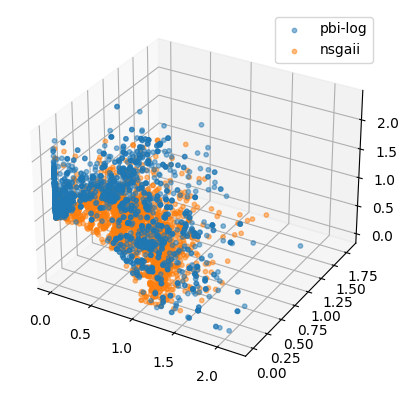

In [6]:
data = {
    # "linear": pd.read_csv(os.path.join("output/dtlz/ii/pbi/", "results.csv")),
    # "chebychev": pd.read_csv(os.path.join("output/dtlz/ii/chebyshev/", "results.csv")),
    # "pbi": pd.read_csv(os.path.join("output/dtlz/ii/pbi/", "results.csv")),
    "pbi-log": pd.read_csv(os.path.join("output/dtlz/ii/pbi-log/", "results.csv")),
    "nsgaii": pd.read_csv(os.path.join("output/dtlz/ii/nsgaii/", "results.csv")),
}


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

for label, results in data.items():
    num_failures = len([1 for v in results["objective_0"] if v == "F"])
    print(f"{label} has {num_failures} failures")

    xs = [-float(v) for v in results["objective_0"] if v != "F"]
    ys = [-float(v) for v in results["objective_1"] if v != "F"]
    zs = [-float(v) for v in results["objective_2"] if v != "F"]

    ax.scatter(xs, ys, zs, s=10, alpha=0.5, label=label)

x = np.array([[0.5, 0.5]])
y = np.array([[0, 1]])
z = np.array([[0, 0]])

ax.plot_surface(x, y, z)

# ax.view_init(-45, 0, 0)
plt.legend()
plt.show()

In [7]:
results_path = {
    "linear": "output/dtlz/ii/linear",
    "chebyshev": "output/dtlz/ii/chebyshev",
    "pbi": "output/dtlz/ii/pbi",
    "pbi-log": "output/dtlz/ii/pbi-log",
    "quad": "output/dtlz/ii/quadratic",
    "nsgaii": "output/dtlz/ii/nsgaii",
}

results = {
    k: pd.read_csv(os.path.join(v, "results.csv")) for k, v in results_path.items()
}

In [8]:
objective_columns = [f"objective_{i}" for i in range(n_objectives)]
pe = metrics.PerformanceEvaluator()

summary = {}
for label, res in results.items():
    print(f"Processing {label}")
    sol = res[objective_columns].values # Maximization format
    # Automatically done in PerformanceEvaluator object
    # sol = np.negative(sol) # Minimization format
    hv, rmse = [], []
    for i in range(min(len(sol), 2000)):
        hv.append(pe.hypervolume(sol[:i+1]))
        rmse.append(pe.rmse(sol[:i+1]))

    summary[label] = {
        "hv": hv,
        "rmse": rmse
    }

Processing linear
Processing chebyshev
Processing pbi
Processing pbi-log
Processing quad
Processing nsgaii


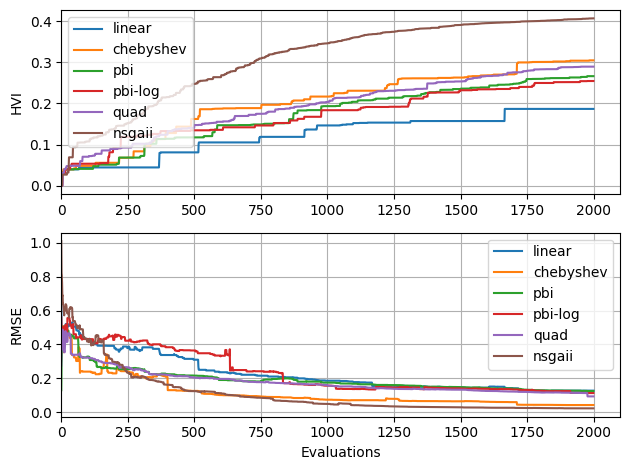

In [9]:
plt.figure()

plt.subplot(2, 1, 1)

for label in summary.keys():
    plt.plot(summary[label]["hv"], label=label)

plt.ylabel("HVI")
plt.xlim(0)
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)

for label in summary.keys():
    plt.plot(summary[label]["rmse"], label=label)

plt.xlabel("Evaluations")
plt.ylabel("RMSE")
plt.xlim(0)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

## Checking effect of objective scaler

scaler='quantile-uniform'


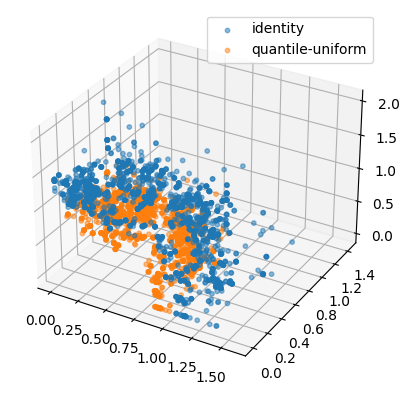

In [10]:
from deephyper.skopt.utils import cook_objective_scaler
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler
from sklearn.pipeline import make_pipeline

path = "output/dtlz/ii/pbi/"
df = pd.read_csv(os.path.join(path, "results.csv"))

objective_columns = [f"objective_{i}" for i in range(n_objectives)]

scaler_label = "quantile-uniform"
scaler = cook_objective_scaler(scaler_label, None)

objectives = -df[objective_columns].values # Maximization to Minimization
objectives_scaled = scaler.fit_transform(objectives)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

xs, ys, zs = objectives.T
ax.scatter(xs, ys, zs, s=10, alpha=0.5, label="identity")

xs, ys, zs = objectives_scaled.T
ax.scatter(xs, ys, zs, s=10, alpha=0.5, label=scaler_label)

# ax.view_init(-45, 0, 0)
plt.legend()
plt.show()